<a href="https://colab.research.google.com/github/deepeshaburse/winter-of-contributing/blob/Datascience_With_Python/disneyland_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/DisneylandReviews.csv", encoding='cp1252', na_values = 'missing', engine='python')

In [3]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [4]:
df.describe()

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [5]:
df.shape

(42656, 6)

In [6]:
df.dropna(inplace = True)

In [7]:
df.Review_ID.nunique()

40023

In [8]:
df.Review_ID.value_counts()

121568004    2
129214104    2
164830205    2
168489234    2
121580686    2
            ..
293917263    1
278053453    1
639814220    1
126558105    1
322889295    1
Name: Review_ID, Length: 40023, dtype: int64

In [9]:
df.drop_duplicates(subset="Review_ID",inplace=True,keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40023 entries, 0 to 42117
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          40023 non-null  int64 
 1   Rating             40023 non-null  int64 
 2   Year_Month         40023 non-null  object
 3   Reviewer_Location  40023 non-null  object
 4   Review_Text        40023 non-null  object
 5   Branch             40023 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [10]:
timeline = df['Year_Month'].str.split('-')
timeline

0         [2019, 4]
1         [2019, 5]
2         [2019, 4]
3         [2019, 4]
4         [2019, 4]
            ...    
42113     [2011, 1]
42114     [2011, 1]
42115    [2010, 12]
42116    [2010, 12]
42117     [2010, 9]
Name: Year_Month, Length: 40023, dtype: object

In [11]:
df['Year'] = timeline.str[0]
df['Month'] = timeline.str[1]

In [12]:
df.drop(["Year_Month"], axis = 1, inplace = True)
df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [13]:
year_viz1 = df.groupby('Year', as_index=False).agg({'Rating':'count'})
year_viz1

,Year,Rating
0,2010,143
1,2011,1976
2,2012,4339
3,2013,4709
4,2014,5300
5,2015,6979
6,2016,6599
7,2017,5195
8,2018,3997
9,2019,786


<function matplotlib.pyplot.show>

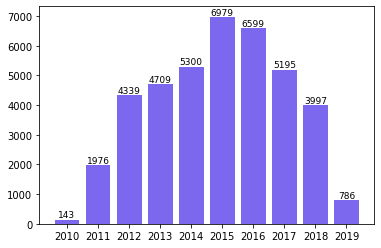

In [14]:
x = year_viz1['Year']
y = year_viz1['Rating']
plt.bar(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

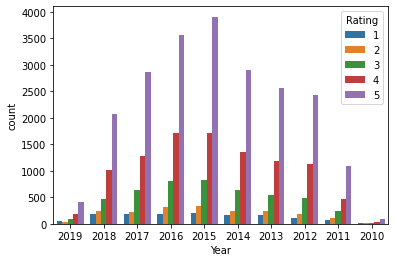

In [15]:
sns.countplot(data = df, x = 'Year', hue = 'Rating')

In [16]:
month_viz1 = df.groupby('Month', as_index=False).agg({'Rating':'count'})
month_viz1

,Month,Rating
0,1,2515
1,10,3764
2,11,2684
3,12,3870
4,2,2459
5,3,3132
6,4,3476
7,5,3436
8,6,3588
9,7,3876


<function matplotlib.pyplot.show>

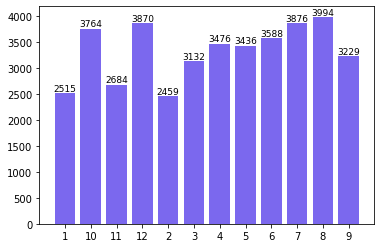

In [17]:
x = month_viz1['Month']
y = month_viz1['Rating']
plt.bar(x, y, color = 'mediumslateblue')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

In [18]:
import plotly.express as px

In [19]:
rlocs_viz = df.groupby('Reviewer_Location', as_index=False).agg({'Rating':'mean'}).sort_values('Rating', ascending=False)

In [20]:
fig = px.choropleth(rlocs_viz, 
                    locations = 'Reviewer_Location', 
                    locationmode = 'country names', 
                    color = 'Rating',
                    hover_data = ['Rating'], 
                    title = 'Average Reviewer Countries')
fig.show()

In [21]:
df.reset_index(inplace=True)
df.shape

(40023, 8)

In [22]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import re

In [23]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [24]:
df['Review']= df['Review_Text'].apply(lambda x: x.lower())

In [25]:
def remove_punctuation(text):
    text = " ".join([word.strip(string.punctuation) for word in text.split(" ")])
    return text
df['Review'] = df['Review'].apply(remove_punctuation)

In [26]:
def remove_numbers_in_word(text):
  text = "".join([word for word in text if not any(c.isdigit() for c in word)])
  return text
df['Review'] = df['Review'].apply(remove_numbers_in_word)

In [27]:
def tokenization(text):
  text = text.split()
  return text
df['Review'] = df['Review'].apply(tokenization)

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation
name = ['disney', 'disneyland', 'iron', 'ironman', 'mickey', 'buz', 'hk', 'california', 'paris', 'hongkong']

def remove_stopwords(text): 
  stop = stopwords.words('english')
  text = [x for x in text if x not in stop_words and x not in name and x not in punctuation] 
  return text
df['Review'] = df['Review'].apply(remove_stopwords)

In [30]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,"[ever, anywhere, find, hong, kong, similar, la..."
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,"[since, last, time, visit, yet, time, stay, to..."
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,"[thanks, god, hot, humid, visiting, park, othe..."
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,"[great, compact, park, unfortunately, quite, b..."
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,"[location, city, took, around, hour, kowlon, k..."


In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer
def lemmatize(text):
  text = [WordNetLemmatizer().lemmatize(word) for word in text]
  return text
df['Review'] = df['Review'].apply(lemmatize)

In [33]:
def join_text(text):
  text = " ".join(text)
  return text
df['Review'] = df['Review'].apply(join_text)

In [34]:
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,ever anywhere find hong kong similar layout wa...
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit yet time stay tomorrowla...
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,great compact park unfortunately quite bit mai...
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around hour kowlon kid like...


In [35]:
df.Branch.nunique()

3

In [36]:
df.Branch.value_counts()

Disneyland_California    18196
Disneyland_Paris         12693
Disneyland_HongKong       9134
Name: Branch, dtype: int64

In [37]:
df['Branch'] = df['Branch'].str.slice(start=11)

In [38]:
df

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,since last time visit yet time stay tomorrowla...
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise w...
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took around hour kowlon kid like...
...,...,...,...,...,...,...,...,...,...
40018,42113,92198076,4,United Kingdom,Although our pick up was prompt the taxi drive...,Paris,2011,1,although pick prompt taxi driver wasnt sure ti...
40019,42114,92061774,4,Germany,Just returned from a 4 days family trip to Dis...,Paris,2011,1,returned day family trip two boy aged reading ...
40020,42115,91995748,1,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Paris,2010,12,spent dec park lunchtime attraction starting c...
40021,42116,91984642,2,United Kingdom,Well I was really looking forward to this trip...,Paris,2010,12,well really looking forward trip christmas per...


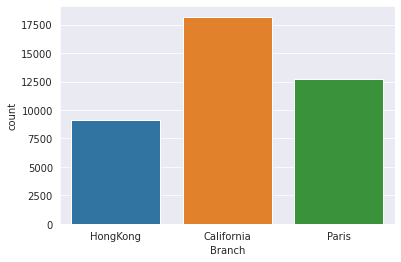

In [39]:
sns.set_style("darkgrid")
sns.countplot(x="Branch", data=df)

<function matplotlib.pyplot.show>

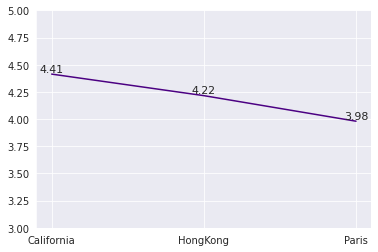

In [40]:
branch_rating = df.groupby('Branch', as_index=False).agg({'Rating':'mean'})

x = branch_rating['Branch']
y = branch_rating['Rating']

plt.plot(x, y, color = 'indigo')
plt.ylim(3,5)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize = 11,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [42]:
california = np.array(Image.open(r"/content/california.png"))
hongkong = np.array(Image.open(r"/content/hongkong.png"))
paris = np.array(Image.open(r"/content/paris.png"))

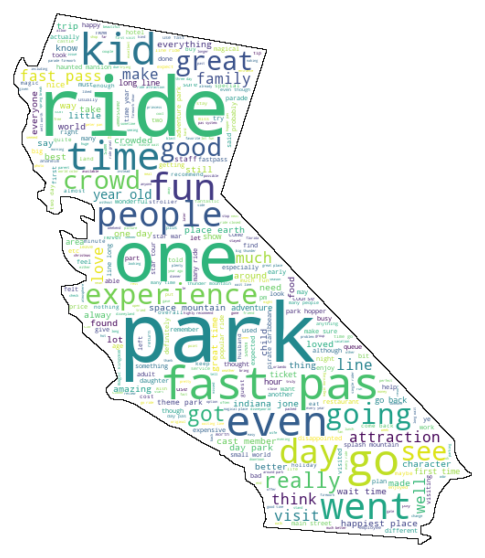

In [44]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = california, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "viridis").generate(" ".join(df[df.Branch == 'California'].Review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

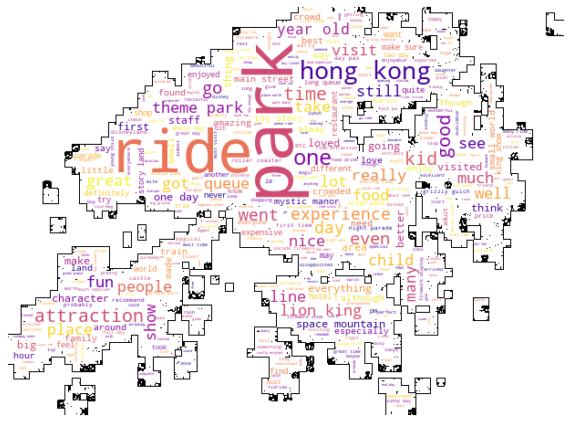

In [46]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = hongkong, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "plasma").generate(" ".join(df[df.Branch == 'HongKong'].Review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

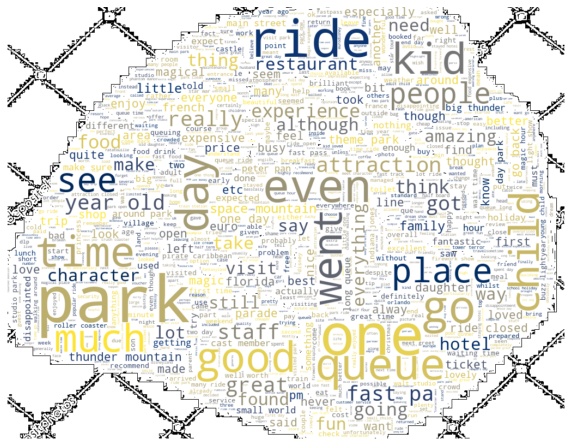

In [47]:
plt.figure(figsize = (10,10))
Wc = WordCloud(mask = paris, background_color='white',
               max_words = 1000 , width = 500 , height = 400, 
               contour_width = 1, contour_color = 'black', colormap = "cividis").generate(" ".join(df[df.Branch == 'Paris'].Review))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [48]:
df['Polarity Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review,Polarity Rating
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,Positive
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,since last time visit yet time stay tomorrowla...,Positive
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,Positive
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took around hour kowlon kid like...,Positive


In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti_analyzer=SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [51]:
v_scores = []

for i in df['Review']:
    score = senti_analyzer.polarity_scores(i)
    v_scores.append(score['compound'])

In [52]:
df['VADER_score'] = v_scores
df.groupby("Rating")["VADER_score"].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,1338.0,0.104109,0.698319,-0.9892,-0.612400,0.2263,0.806175,0.9988
2,1929.0,0.365736,0.632350,-0.9871,-0.096000,0.6369,0.902200,0.9984
3,4778.0,0.566184,0.520814,-0.9766,0.371675,0.8122,0.942300,0.9990
4,10079.0,0.766610,0.343680,-0.9938,0.742950,0.9044,0.964800,0.9999
5,21899.0,0.814236,0.273154,-0.9337,0.790600,0.9175,0.967400,0.9999


In [54]:
df['Vader Rating'] = df['VADER_score'].apply(lambda x: 'Positive' if x > 0 else('Neutral' if x == 0 else 'Negative'))
df.head()

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review,Polarity Rating,VADER_score,Vader Rating
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,Positive,0.7889,Positive
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,since last time visit yet time stay tomorrowla...,Positive,0.9860,Positive
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive,0.9864,Positive
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,Positive,0.8739,Positive
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took around hour kowlon kid like...,Positive,0.5106,Positive


In [55]:
location = pd.get_dummies(df['Branch'])
df = pd.concat([df,location],axis=1)
df

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review,Polarity Rating,VADER_score,Vader Rating,California,HongKong,Paris
0,0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,2019,4,ever anywhere find hong kong similar layout wa...,Positive,0.7889,Positive,0,1,0
1,1,670682799,4,Philippines,Its been a while since d last time we visit HK...,HongKong,2019,5,since last time visit yet time stay tomorrowla...,Positive,0.9860,Positive,0,1,0
2,2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,2019,4,thanks god hot humid visiting park otherwise w...,Positive,0.9864,Positive,0,1,0
3,3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,2019,4,great compact park unfortunately quite bit mai...,Positive,0.8739,Positive,0,1,0
4,4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",HongKong,2019,4,location city took around hour kowlon kid like...,Positive,0.5106,Positive,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40018,42113,92198076,4,United Kingdom,Although our pick up was prompt the taxi drive...,Paris,2011,1,although pick prompt taxi driver wasnt sure ti...,Positive,-0.8507,Negative,0,0,1
40019,42114,92061774,4,Germany,Just returned from a 4 days family trip to Dis...,Paris,2011,1,returned day family trip two boy aged reading ...,Positive,0.9948,Positive,0,0,1
40020,42115,91995748,1,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Paris,2010,12,spent dec park lunchtime attraction starting c...,Negative,0.8886,Positive,0,0,1
40021,42116,91984642,2,United Kingdom,Well I was really looking forward to this trip...,Paris,2010,12,well really looking forward trip christmas per...,Negative,0.9199,Positive,0,0,1


In [56]:
df.drop(['Branch','index','Review_Text'],axis=1,inplace=True)
df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location     object
Year                  object
Month                 object
Review                object
Polarity Rating       object
VADER_score          float64
Vader Rating          object
California             uint8
HongKong               uint8
Paris                  uint8
dtype: object

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['Reviewer_Location','Year','Polarity Rating','Vader Rating']:
    df[i] = le.fit_transform(df[i])

In [59]:
df["Month"] = pd.to_numeric(df["Month"])
df

,Review_ID,Rating,Reviewer_Location,Year,Month,Review,Polarity Rating,VADER_score,Vader Rating,California,HongKong,Paris
0,670772142,4,8,9,4,ever anywhere find hong kong similar layout wa...,2,0.7889,2,0,1,0
1,670682799,4,114,9,5,since last time visit yet time stay tomorrowla...,2,0.9860,2,0,1,0
2,670623270,4,151,9,4,thanks god hot humid visiting park otherwise w...,2,0.9864,2,0,1,0
3,670607911,4,8,9,4,great compact park unfortunately quite bit mai...,2,0.8739,2,0,1,0
4,670607296,4,152,9,4,location city took around hour kowlon kid like...,2,0.5106,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40018,92198076,4,152,1,1,although pick prompt taxi driver wasnt sure ti...,2,-0.8507,0,0,0,1
40019,92061774,4,50,1,1,returned day family trip two boy aged reading ...,2,0.9948,2,0,0,1
40020,91995748,1,152,0,12,spent dec park lunchtime attraction starting c...,0,0.8886,2,0,0,1
40021,91984642,2,152,0,12,well really looking forward trip christmas per...,0,0.9199,2,0,0,1


In [60]:
X = df['Review']
y = df['Polarity Rating']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

print(X_train.shape, X_test.shape) 
np.unique(y_train, return_counts=True)

(32018,) (8005,)


(array([0, 1, 2]), array([ 2614,  3822, 25582]))

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<32018x30752 sparse matrix of type '<class 'numpy.float64'>'
	with 1570799 stored elements in Compressed Sparse Row format>

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print(dt.score(X_train_vectorized, y_train))
print(dt.score(vect.transform(X_test), y_test))

0.98538322193766
0.7500312304809494


In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print(rf.score(X_train_vectorized, y_train))
print(rf.score(vect.transform(X_test), y_test))

0.962052595415079
0.8003747657713929


In [68]:
X = df['Review']
y = df['Vader Rating']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)

print(X_train.shape, X_test.shape) 
np.unique(y_train, return_counts=True)

(32018,) (8005,)


(array([0, 1, 2]), array([ 2314,   379, 29325]))

In [70]:
stop_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(X_train)
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<32018x30828 sparse matrix of type '<class 'numpy.float64'>'
	with 1573591 stored elements in Compressed Sparse Row format>

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 100, random_state = 42)
dt.fit(X_train_vectorized, y_train)
print(dt.score(X_train_vectorized, y_train))
print(dt.score(vect.transform(X_test), y_test))

0.9916297082890874
0.8976889444097439


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 100, random_state = 42)
rf.fit(X_train_vectorized, y_train)
print(rf.score(X_train_vectorized, y_train))
print(rf.score(vect.transform(X_test), y_test))

0.9603348116684365
0.9159275452841974
